In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json 

from config import apikey

In [2]:
# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_lat = []
city_lng = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lat.append(lat_lng[0])
        city_lng.append(lat_lng[1])
        #city_coord.append(lat_lng)
        

# Print the city count to confirm sufficient count
len(cities)

603

In [4]:
weather_df = pd.DataFrame({"City": cities, "Latitude": city_lat, "Longitude": city_lng})
weather_df.head()

,City,Latitude,Longitude
0,tuktoyaktuk,77.514976,-139.359779
1,katsuura,24.310434,152.007063
2,nizhneyansk,89.775382,133.429985
3,belmonte,-17.849120,-30.525530
4,angoche,-17.874731,42.399016


In [5]:
# add columns for temp, humidity, cloudiness, wind speed

weather_df["Temperature"] = ""
weather_df["Humidity"] = ""
weather_df["Cloudiness"] = ""
weather_df["Wind_speed"] = ""
weather_df["Record_Date"] = ""
weather_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_speed,Record_Date
0,tuktoyaktuk,77.514976,-139.359779,,,,,
1,katsuura,24.310434,152.007063,,,,,
2,nizhneyansk,89.775382,133.429985,,,,,
3,belmonte,-17.849120,-30.525530,,,,,
4,angoche,-17.874731,42.399016,,,,,


In [6]:
for index, row in weather_df.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = row["City"]
    units = "imperial"
    query_url = f"{url}appid={apikey}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_response = weather_response.json()
    #print(json.dumps(weather_response, indent=4, sort_keys=True))
    print(f"Processing Record {index} | {city}")
    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        weather_df.loc[index, "Temperature"] = weather_response["main"]["temp"]
        weather_df.loc[index, "Humidity"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Cloudiness"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Wind_speed"] = weather_response["wind"]["speed"]
        weather_df.loc[index, "Record_Date"] = weather_response["dt"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

Processing Record 0 | tuktoyaktuk
Processing Record 1 | katsuura
Processing Record 2 | nizhneyansk
Missing field/result... skipping.
Processing Record 3 | belmonte
Processing Record 4 | angoche
Processing Record 5 | iqaluit
Processing Record 6 | palauig
Processing Record 7 | koumac
Processing Record 8 | komsomolskiy
Processing Record 9 | ushuaia
Processing Record 10 | great yarmouth
Processing Record 11 | kyra
Missing field/result... skipping.
Processing Record 12 | cayenne
Processing Record 13 | port lincoln
Processing Record 14 | carnarvon
Processing Record 15 | gat
Processing Record 16 | huasahuasi
Processing Record 17 | hobart
Processing Record 18 | catuday
Processing Record 19 | san luis
Processing Record 20 | lebu
Processing Record 21 | revda
Processing Record 22 | souillac
Processing Record 23 | yellowknife
Processing Record 24 | vaini
Processing Record 25 | airai
Processing Record 26 | belushya guba
Missing field/result... skipping.
Processing Record 27 | bakonyszentlaszlo
Proc

Processing Record 224 | tsihombe
Missing field/result... skipping.
Processing Record 225 | nyuksenitsa
Processing Record 226 | fevralsk
Missing field/result... skipping.
Processing Record 227 | ichnya
Processing Record 228 | yuxia
Processing Record 229 | roald
Processing Record 230 | roanne
Processing Record 231 | tonj
Missing field/result... skipping.
Processing Record 232 | dali
Processing Record 233 | finspang
Processing Record 234 | tlalpujahua
Missing field/result... skipping.
Processing Record 235 | vostok
Processing Record 236 | mineros
Processing Record 237 | agirish
Processing Record 238 | campos belos
Processing Record 239 | goderich
Processing Record 240 | tumannyy
Missing field/result... skipping.
Processing Record 241 | presidencia roque saenz pena
Processing Record 242 | northam
Processing Record 243 | xam nua
Processing Record 244 | khor
Processing Record 245 | lompoc
Processing Record 246 | marcona
Missing field/result... skipping.
Processing Record 247 | victoria
Proce

Processing Record 444 | jumla
Processing Record 445 | magalia
Processing Record 446 | champerico
Processing Record 447 | villazon
Missing field/result... skipping.
Processing Record 448 | yubari
Missing field/result... skipping.
Processing Record 449 | hirara
Processing Record 450 | fort nelson
Processing Record 451 | asau
Missing field/result... skipping.
Processing Record 452 | pervomayskiy
Processing Record 453 | poum
Processing Record 454 | berlevag
Processing Record 455 | vestmannaeyjar
Processing Record 456 | barinas
Processing Record 457 | loandjili
Processing Record 458 | dubna
Processing Record 459 | oshakati
Processing Record 460 | luebo
Processing Record 461 | bucovat
Processing Record 462 | urengoy
Processing Record 463 | clyde river
Processing Record 464 | banka
Processing Record 465 | dunmore
Processing Record 466 | tutoia
Processing Record 467 | alta floresta
Processing Record 468 | oussouye
Processing Record 469 | bam
Processing Record 470 | tabiauea
Missing field/resul

In [7]:
weather_df.head(10)

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_speed,Record_Date
0,tuktoyaktuk,77.514976,-139.359779,-2.21,77,75,11.41,1543186800
1,katsuura,24.310434,152.007063,48.2,87,75,9.17,1543186800
2,nizhneyansk,89.775382,133.429985,,,,,
3,belmonte,-17.849120,-30.525530,44.66,88,0,13.11,1543190926
4,angoche,-17.874731,42.399016,80.12,100,48,5.61,1543191097
5,iqaluit,65.561210,-78.196307,14,85,75,2.24,1543187460
6,palauig,14.935232,117.550121,76.61,92,0,3.94,1543191098
7,koumac,-23.354648,161.555385,79.67,89,0,12.33,1543191098
8,komsomolskiy,66.553528,171.484909,-0.66,77,68,10.42,1543191098
9,ushuaia,-76.968367,-19.325184,48.2,61,75,16.11,1543186800


In [15]:
#replace empty strings with np.nan so that dropna function will recognize and drop
weather_df["Temperature"].replace("", np.nan, inplace=True)
weather_df["Humidity"].replace("", np.nan, inplace=True)
weather_df["Cloudiness"].replace("", np.nan, inplace=True)
weather_df["Wind_speed"].replace("", np.nan, inplace=True)
weather_df["Record_Date"].replace("", np.nan, inplace=True)

In [16]:
weather_df.head(10)

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_speed,Record_Date
0,tuktoyaktuk,77.514976,-139.359779,-2.21,77.0,75.0,11.41,1543186800
1,katsuura,24.310434,152.007063,48.20,87.0,75.0,9.17,1543186800
3,belmonte,-17.849120,-30.525530,44.66,88.0,0.0,13.11,1543190926
4,angoche,-17.874731,42.399016,80.12,100.0,48.0,5.61,1543191097
5,iqaluit,65.561210,-78.196307,14.00,85.0,75.0,2.24,1543187460
6,palauig,14.935232,117.550121,76.61,92.0,0.0,3.94,1543191098
7,koumac,-23.354648,161.555385,79.67,89.0,0.0,12.33,1543191098
8,komsomolskiy,66.553528,171.484909,-0.66,77.0,68.0,10.42,1543191098
9,ushuaia,-76.968367,-19.325184,48.20,61.0,75.0,16.11,1543186800
10,great yarmouth,54.582261,2.184177,44.60,81.0,88.0,5.82,1543189800


In [17]:
#drop nan values
weather_df.dropna(inplace=True)

In [18]:
#make sure rows containing null values have been dropped
weather_df.count()

City           531
Latitude       531
Longitude      531
Temperature    531
Humidity       531
Cloudiness     531
Wind_speed     531
Record_Date    531
dtype: int64

In [19]:
# Save data frame to CSV
weather_df.to_csv(output_data_file)

In [13]:
# ====== Latitude vs. Temperature Scatter plot ========

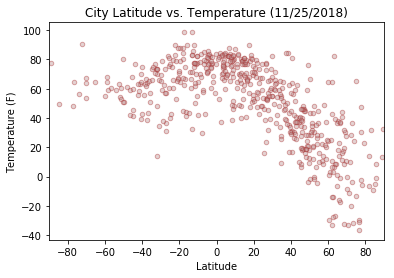

In [22]:
latitude_temperature = weather_df.plot(kind="scatter", x="Latitude", y="Temperature", color="rosybrown", xlim=lat_range, alpha = 0.4, edgecolor = "brown", linewidths = 1)

plt.title("City Latitude vs. Temperature (11/25/2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Latitude_Temperature.png")


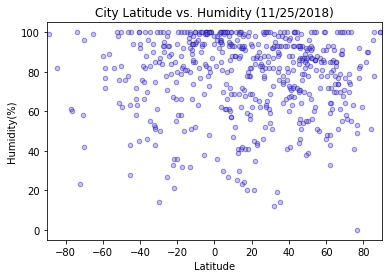

In [23]:
# ======= Latitude vs. Humidity  ========

latitude_humidity = weather_df.plot(kind="scatter", x="Latitude", y="Humidity", color="mediumslateblue", xlim=lat_range, alpha = 0.4, edgecolor = "darkblue", linewidths = 1)

plt.title("City Latitude vs. Humidity (11/25/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("Latitude_Humidity.png")


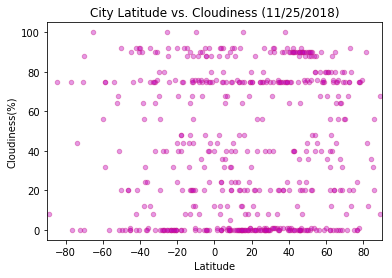

In [24]:
# ======= Latitude vs. Cloudiness  ========

latitude_cloudiness = weather_df.plot(kind="scatter", x="Latitude", y="Cloudiness", color="m", xlim=lat_range, alpha = 0.4, edgecolor = "mediumvioletred", linewidths = 1)

plt.title("City Latitude vs. Cloudiness (11/25/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("Latitude_Cloudiness.png")


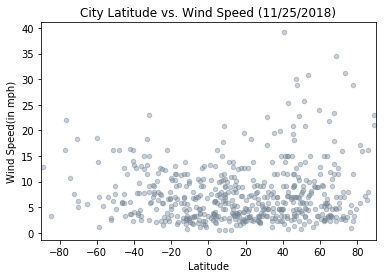

In [26]:
# ======= Latitude vs. Windspeed  ========

latitude_windspeed = weather_df.plot(kind="scatter", x="Latitude", y="Wind_speed", color="lightslategray", xlim=lat_range, alpha = 0.4, edgecolor = "slategray", linewidths = 1)

plt.title("City Latitude vs. Wind Speed (11/25/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(in mph)")
plt.savefig("Latitude_WindSpeed.png")
